## <span style="font-size: 28px;"><strong>A Pipeline to Analyse of 21cm HI Line Data taken from a Horn Antenna</strong></span>
In this code, we will analyse the data collected from various regions of the Milky Way Galaxy to calculate the radial velocity in those regions. The data was collected from the central part of the Galaxy, specifically within the region of 0° to 70° galactic longitude and 0° galactic latitude.

## <span style="font-size: 20px;"><strong>Importing Required libraries</strong></span>
Let's start with importing some necessary libraries.

In [1]:
#importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## <span style="font-size: 20px;"><strong>Important Constants</strong></span> 
These are some important constants that we will be needing in our equations.

In [2]:
v_corr = -9935.672167861085 #Velocity Correction
t_sky = 5 #in Kelvins
t_grnd = 300 #in Kelvins
f_start = 1419500000 #Start Frequency in Hz
f_end = 1421500000 #End Frequency in Hz
f_step = 3906.25 #Step Frequency in Hz
f_hydrogen = 1420405751 #Emission Frequency of Neutral Hydrogen
V0 = 218000 #Radial velocity of Local Standard of Rest(LSR) in m/s
R0 = 8.5 #Radial distance of LSR in kpc
longitude = 10 #Location of source in Galactic Coordinate System

## <span style="font-size: 20px;"><strong>Generating Frequency Array</strong></span>
We are generating a frequency array using the starting, ending, and step frequencies. This array will be used to create a graph plotting the relationship between temperature and velocity in various regions of our Milky Way Galaxy.

In [3]:
freq = [] #Array of all frequencies
while f_start <= f_end:
  freq.append(f_start)
  f_start += f_step
freq = np.array(freq)

## <span style="font-size: 20px;"><strong>Generating Velocity Array</strong></span>
Using the generated frequency array, we will create a velocity array by applying the following formula:<br><br>
<span style="font-size: 15px;">$$\text{velocity} = c \left(1 - \frac{f_a}{f_h}\right) + v_{\text{corr}}$$</span>
Here,
- $c$ represents the speed of light, which is equal to 299,792,458 m/s.
- $f_h$ represents the emission frequency of neutral hydrogen, which is equal to 1,420,405,751 Hz.
- $f_a$ represents the frequencies present in the frequency array.
- $v_{\text{corr}}$ represents the velocity correction value.

In [4]:
velocity = [] #Array of velocities without velocity correction
for i in freq:
    velo = 299792458*(1 - (i/f_hydrogen))
    velocity.append(velo)
velocity = np.array(velocity)
velocity = velocity + v_corr

## <span style="font-size: 20px;"><strong>Importing the Data</strong></span>
We are importing experimentally measured data for the ground, sky, and source. This data is stored in CSV format with specific file names. We will use the NumPy library to import respective arrays for the ground, sky, and source based on these file names.


In [5]:
#Creating arrays to store the powers in dbm
grnd_dbm = [] #Power from Ground in dbm
sky_dbm = [] #Power from Sky in dbm
source_dbm = [] #Power from Source in dbm

In [6]:
#Importing ground data 
grnd_dbm = np.genfromtxt('ground2a.csv', delimiter=',') #this statement imports the data and stores it in a list
grnd_dbm = grnd_dbm[6:] #removes the first unwanted 6 items 
grnd_dbm = np.array(grnd_dbm) #the list is now converted into a numpy array

#Importing sky data
sky_dbm = np.genfromtxt('sky2a.csv', delimiter=',')
sky_dbm = sky_dbm[6:]
sky_dbm = np.array(sky_dbm)

#Importing source data
source_dbm = np.genfromtxt('ten2a.csv', delimiter=',')
source_dbm = source_dbm[6:]
source_dbm = np.array(source_dbm)

In [7]:
#Creating arrays to store the power in watts
grnd = [] #Power from Ground in Watt
sky = [] #Power from Sky in Watt
source = [] #Power from Source in Watt

## <span style="font-size: 20px;"><strong>Data Conversion</strong></span>
The data stored in the array is in units of dBm, so we will be converting the data to watts using the following formula:<br><br>
<span style="font-size: 15px;">$$D_{\text{watts}} = 10^{\frac{D_{\text{dBm}} - 30}{10}}$$</span>
Here,
- $D_{\text{watts}}$ represents the data in terms of watts.
- $D_{\text{dBm}}$ represents the data in terms of dBm.

In [8]:
#Conversion of all powers from dbm to watt
grnd = 10**((grnd_dbm-30)/(10))
sky = 10**((sky_dbm-30)/(10))
source = 10**((source_dbm-30)/(10))

## <span style="font-size: 20px;"><strong>Calculating the Temperature of the System</strong></span>
We will calculate the temperature of our system using the data arrays for ground and sky, following the formula:<br><br>
<span style="font-size: 15px;">\begin{align*}
T_r &= \frac{T_{\text{sky}} \left(\frac{P_{\text{grnd}}}{P_{\text{sky}}}\right) - T_{\text{grnd}}}{1 - \left(\frac{P_{\text{grnd}}}{P_{\text{sky}}}\right)}\end{align*}</span>
Here,
- $T_r$ represents the temperature of system.
- ${T_{\text{sky}}}$ represents the temperature of sky.
- ${T_{\text{grnd}}}$ represents the temperature of ground.
- ${P_{\text{sky}}}$ represents the data of sky in terms of power.
- ${P_{\text{grnd}}}$ represents the data of ground in terms of power.



In [9]:
t_r = (t_sky*(grnd/sky) - t_grnd)/(1 - (grnd/sky))

## <span style="font-size: 20px;"><strong>Calculating the Temperature of the Source and Plotting a Temperature vs. Velocity Graph </strong></span>
Using the data collected from the source and the calculated temperature of the system, we will determine the temperature of the source using the following formula:<br><br>
<span style="font-size: 15px;">\begin{align*}
T_{\text{source}} &= \left(\frac{T_{\text{grnd}} + T_r}{\frac{P_{\text{grnd}}}{P_{\text{source}}}}\right) - T_r
\end{align*}
</span>
Here,
- $T_{\text{source}}$ represents the temperature of source.
- $T_r$ represents the temperature of system.
- ${T_{\text{grnd}}}$ represents the temperature of ground.
- ${P_{\text{source}}}$ represents the data of source in terms of power.
- ${P_{\text{grnd}}}$ represents the data of ground in terms of power.

The array of source temperatures is plotted against the array of velocities in the process to determine the actual velocity of a particular source.


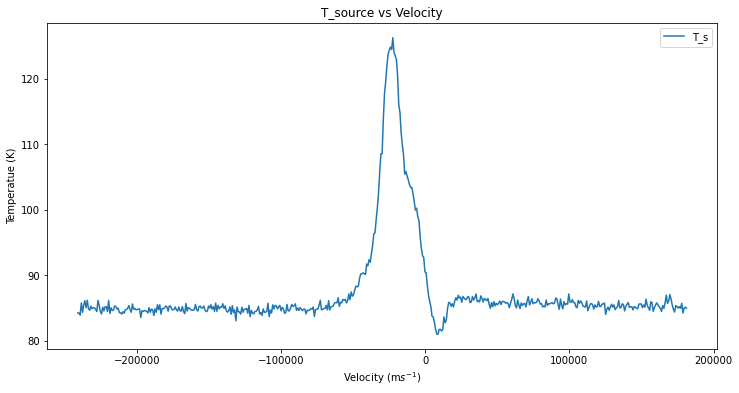

In [10]:
t_s = ((t_grnd + t_r)/(grnd/source)) - t_r
plt.figure(figsize=(12, 6))
plt.plot(velocity, t_s, '-',label = 'T_s')
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.title ("T_source vs Velocity")
plt.legend()

## <span style="font-size: 20px;"><strong>Plotting the $T_r$ Graph </strong></span>
A graph of the system's temperature is plotted against the frequency array to analyze the impact of the system's temperature on the source data.

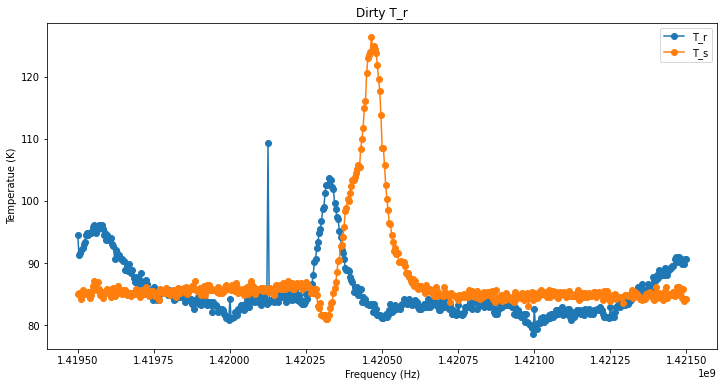

In [11]:
#Plotting T_r and T_s to show the artifacts in T_r
plt.figure(figsize=(12, 6))
plt.plot(freq, t_r, '-o', label = 'T_r')
plt.plot(freq, t_s, '-o',label = 'T_s')
plt.title ("Dirty T_r")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Temperatue (K)')
plt.legend()

## <span style="font-size: 20px;"><strong>Cleaning the $T_r$ Graph </strong></span>
The unnecessary peak in the $T_r$ graph at around 1420 MHz caused a dip in the $T_{\text{source}}$ plot. This peak resulted from the high intensity of the 1420 MHz electromagnetic wave being captured in the sky data. Calibration of the $T_r$ graph, by removing this peak, eliminates the unnecessary dip in the $T_{\text{source}}$ graph.

In [12]:
#Chosing the frequency closest to 1420.4057 MHz
def closest_number(arr, target):
    absolute_diff = np.abs(arr - target) # Calculate the absolute differences between each element and the target
    closest_index = np.argmin(absolute_diff) # Find the index of the element with the minimum absolute difference
    closest_num = arr[closest_index] # Retrieve the closest number from the array using the index
    return closest_num

# Get the closest number from the array to the target value
ch_freq = closest_number(freq, f_hydrogen)

index, = np.where(freq == ch_freq)
start_index = int(index) - 40 #The subtraction value can be changed to vary the width of the bridge (depending on the data)
end_index = int(index) + 20 #The addition value can be changed to vary the width of the bridge (depending on the data)

#Calculating the value of the bridge
x = t_r[(start_index - 5):(start_index)]
x_mean = np.mean(x)
y = t_r[(end_index):(end_index + 6)]
y_mean = np.mean(y)
bridge_value = (x_mean + y_mean)/2

#Assigning the value to the bridge
t_r[start_index:end_index + 1] = bridge_value

## <span style="font-size: 20px;"><strong>Plotting the Corrected T_r Graph</strong></span>

Text(0.5, 1.0, 'Cleaned T_r')

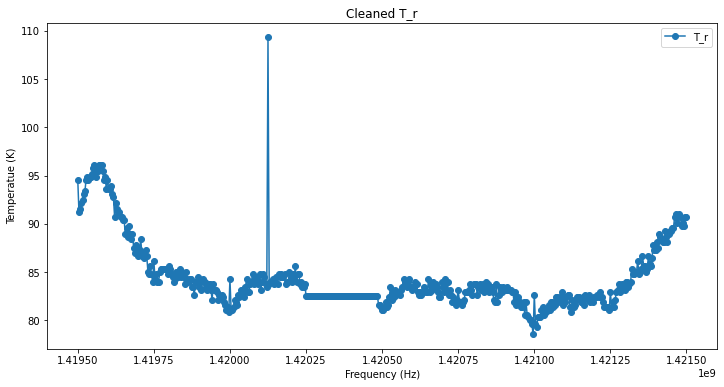

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(freq, t_r, 'o-', label = 'T_r')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Temperatue (K)')
plt.title("Cleaned T_r")

## <span style="font-size: 20px;"><strong>Plotting the Corrected $T_{\text{source}}$ Graph</strong></span>
The values of $T_{\text{source}}$ are recalculated using the calibrated $T_r$ values. The corrected $T_{\text{source}}$ graph is plotted with a zero baseline for enhanced graph analysis.

In [14]:
#Recalculating the T_source 
t_corrected = ((t_grnd + t_r)/(grnd/source)) - t_r

Text(0.5, 1.0, 'Corrected T_source')

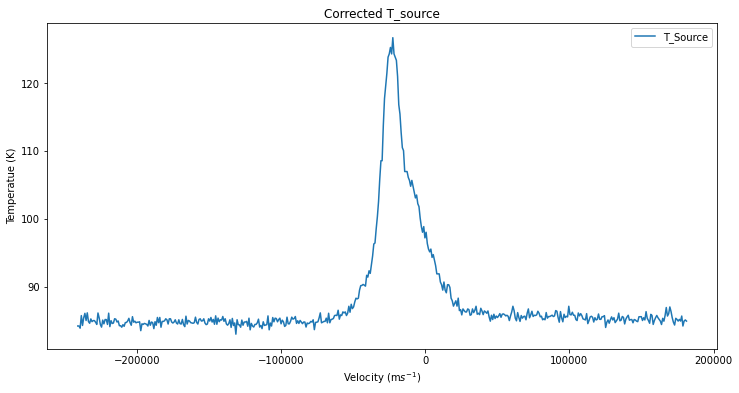

In [15]:
#Plotting the corrected T_source
plt.figure(figsize=(12, 6))
plt.plot(velocity, t_corrected, '-', label = 'T_Source')
plt.legend()
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.title("Corrected T_source")

In [16]:
#Shifting the baseline to zero
first = sum(t_corrected[:3])
last = sum(t_corrected[-3:]) 
avg = ((first + last)/6)
t_zero_baseline = t_corrected - avg 

Text(0.5, 1.0, 'Corrected T_source')

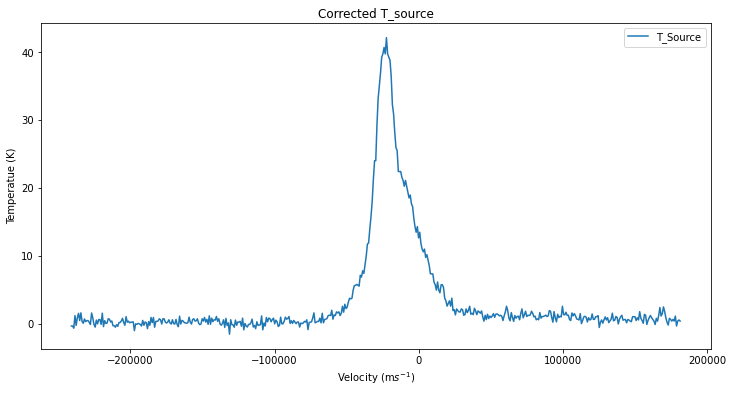

In [17]:
#Plotting the T_source with based from zero
plt.figure(figsize=(12, 6))
plt.plot(velocity, t_zero_baseline, '-', label = 'T_Source')
plt.legend()
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.title("Corrected T_source")

## <span style="font-size: 20px;"><strong>Gaussian fitting</strong></span>
Using the discrete points of the $T_{\text{source}}$ plot we will create a model fit to gain a deeper understanding of the graph. This model fit is generated using the Gaussian fitting method, which is formulated by the following equation:<br><br>
<span style="font-size: 15px;">$$f(x) = A\frac{e^{\frac{-(x - \mu)^2}{(2 \sigma^2)}}}{\sigma \sqrt{2 \pi}}$$</span>
Here,
- $f(x)$ the value of the Gaussian function at point $x$.
- $A$ is the amplitude or the maximum value of the peak (the height of the curve).
- $μ$ is the mean or the center of the peak (the position of the peak on the x-axis).
- $σ$ is the standard deviation, which controls the width of the peak (a smaller $σ$ results in a narrower peak).
- $e$ is the mathematical constant Euler's number (e≈2.71828).
- $π$ is the mathematical constant pi ($π$≈3.14159).

This curve fitting technique varies depending on the characteristics of each graph. The number of Gaussian curves required for the fitting depends on various factors specific to the graph in question. Using the Gaussian fitting method, we plot a model graph of $T_{\text{source}}$ alongside the original $T_{\text{source}}$ graph.

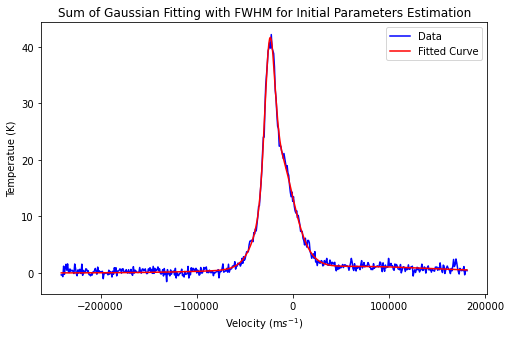

In [18]:
#Define the Gaussians function
def gaussian(x, amplitude, mean, stddev):
    return (amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2)))/(stddev *(np.sqrt(2 * np.pi)))

#Define the function for the sum of Gaussians
def sum_of_gaussians(x, *params):
        result = np.zeros_like(x)
        for i in range(0, len(params), 3):
            amplitude = params[i]
            mean = params[i + 1]
            stddev = params[i + 2]
            result += gaussian(x, amplitude, mean, stddev)
        return result

#Function to calculate FWHM
def fwhm_from_data(x, y):
    half_max = np.max(y) / 2.0
    mask = y > half_max
    return np.abs(x[mask][-1] - x[mask][0])

#Orignal data
x = velocity
y = t_zero_baseline

#Calculate FWHM from the data
fwhm_estimated = fwhm_from_data(x,y)

#Use FWHM to estimate initial parameters for each Gaussian
n_gaussians = 4  # Number of Gaussian components in the sum
params_initial = []
for i in range(n_gaussians):
    amplitude_initial = np.max(y) / n_gaussians
    mean_initial = x[np.argmax(y)]
    stddev_initial = fwhm_estimated / (2 * np.sqrt(2 * np.log(2)))
    params_initial.extend([amplitude_initial, mean_initial, stddev_initial])

#Perform curve fitting with the estimated initial parameters
popt, _ = curve_fit(sum_of_gaussians, x, y, p0=params_initial, maxfev=999999)

#Generate the fitted points 
y_fit = sum_of_gaussians(x, *popt)

#Plot the original data and fitted sum of Gaussian curves
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b', label='Data')
plt.plot(x, y_fit, 'r', label='Fitted Curve')
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.legend()
plt.title('Sum of Gaussian Fitting with FWHM for Initial Parameters Estimation')
plt.show()

## <span style="font-size: 20px;"><strong>Plotting the Gaussians</strong></span>
A graph containing individual Gaussians, which are used for the model fit, is plotted alongside the original data.

Text(0, 0.5, 'Temperatue (K)')

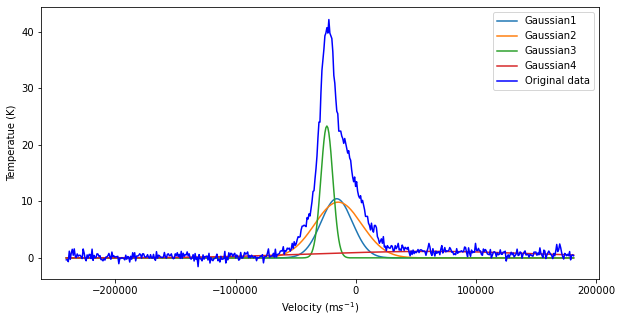

In [19]:
plt.figure(figsize=(10, 5))
for i in range(n_gaussians):
    amp=(popt[i*3])
    cen=(popt[i*3+1])
    wid=(popt[i*3+2])
    plt.plot(x, gaussian(x, amp, cen, wid), label=f'Gaussian{i+1}')
plt.plot(x, y, 'b-', label='Original data')
plt.legend(loc='upper right')
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')

## <span style="font-size: 20px;"><strong>Plotting the Residual</strong></span>
The disparity between the fitted graph and the original graph is quantified through the calculation of residuals. These residuals are subsequently plotted to assess the degree of accuracy achieved by the fitted graph.

Text(0.5, 1.0, 'Residual')

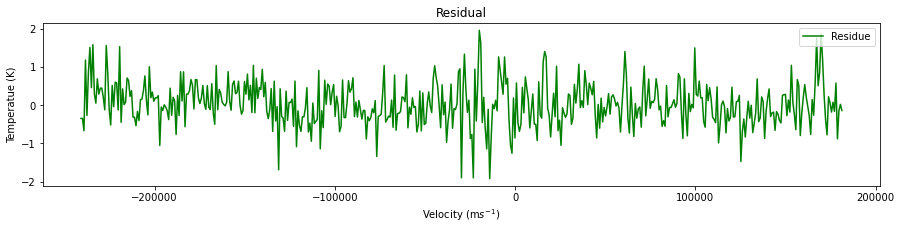

In [20]:
#Genrate and Plot Residual
residue = y - y_fit
plt.figure(figsize=(15, 3))
plt.plot(x, residue, 'g-', label= 'Residue')
plt.legend(loc='upper right')
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.title('Residual')

## <span style="font-size: 20px;"><strong>Obtaining Most Redshifted Velocity</strong></span>
Using the residual data, we determine the boundary point for $T_{\text{source}}$. With this boundary point established, we calculate the most redshifted velocity. This velocity signifies the source velocity in relation to the local standard of rest (LSR), which represents the centroid of motion for stars near our Sun.

In [21]:
#Generate Standard deviation of residue and the requied boundary point
std_deviation = np.std(residue)
boundary_point = 3 * std_deviation

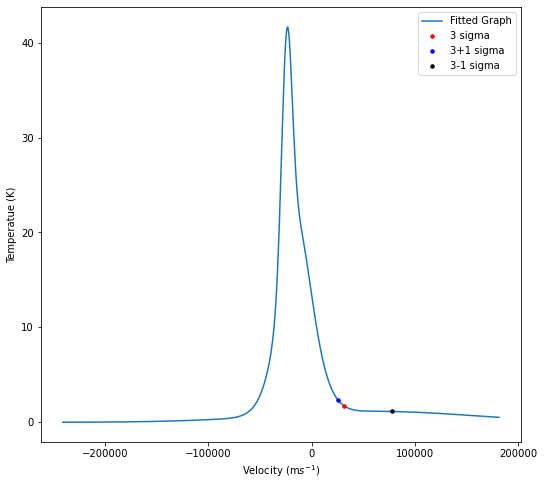

In [22]:
# filter to get the values greater than or equal to the boundary_point
filtered_values = [value for value in y_fit if value >= boundary_point]

# Generate the velocity corresponding to the most redshifted point
redshifted_velocity = x[y_fit == filtered_values[0]][0]

# Generate the velocity corresponding to error bar points
# boundary_point + 1sigma
filtered_values1 = [value for value in y_fit if value >= boundary_point+std_deviation] 
redshifted_velocity1 = x[y_fit == filtered_values1[0]][0]

# boundary_point - 1sigma
filtered_values2 = [value for value in y_fit if value >= boundary_point-std_deviation] 
redshifted_velocity2 = x[y_fit == filtered_values2[0]][0]

#Plot the most redshifted point along with error bar points
plt.figure(figsize=(8.6,8))
plt.plot(x, y_fit, label="Fitted Graph", zorder=1)
plt.scatter(redshifted_velocity, filtered_values[0], color="red", s=12, label="3 sigma", zorder=2)
plt.scatter(redshifted_velocity1, filtered_values1[0], color="blue", s=12, label="3+1 sigma", zorder=2)
plt.scatter(redshifted_velocity2, filtered_values2[0], color="black", s=12, label="3-1 sigma", zorder=2)
plt.legend()
plt.xlabel('Velocity (m$s^{-1}$)')
plt.ylabel('Temperatue (K)')
plt.show()

In [23]:
#Printing the most redshifted velocity
print("The most Redshifted Velocity is",redshifted_velocity,'m/s')

The most Redshifted Velocity is 31181.887357265674 m/s


## <span style="font-size: 20px;"><strong>Calculating Radial Velocity and Radial Distance</strong></span>
The velocity of source which we have obtained is w.r.t the LSR, but we want to find out the velocity of source w.r.t the centre of galaxy (radial velocity). So using most redshifted velocity we will calculate the radial velocity by following equation:<br><br>
<span style="font-size: 15px;">$$V = v_{\text{max}} + V_0\sin\theta$$</span>
Here,
- $V$ is the Radial Velocity of source.
- $v_{\text{max}}$ is most redshifted velocity .
- $V_0$ is the velocity of Source w.r.t LSR.
- $\theta$ is longitude of the source.

Similarly, using the longitude of the source, we will calculate the radial distance of the source using the following equation:<br><br>
<span style="font-size: 15px;">$$R = R_0\sin\theta$$</span>
Here,
- $R$ is the Radial Distance of source.
- $R_0$ is the Radial Distance of LSR.
- $\theta$ is longitude of the source.


In [24]:
#Radial Velocity
radians = np.radians(longitude) #converting degrees into radians
V = redshifted_velocity + (V0*(np.sin(radians))) #calculating radial velocity in m/s.
V = V/1000 #converting radial velocity from m/s to km/s. 
print('The Radial Velocity of the Source is',V,'km/s') 

The Radial Velocity of the Source is 69.03719008865649 km/s


In [25]:
#Rddial Distance
R = R0*(np.sin(radians)) #calculating radial velocity in kpc.
print('The Radial Distance of the Source is',R,'kpc')

The Radial Distance of the Source is 1.476009510168908 kpc
